In [179]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
f = open('../output/count_day.out','r')
xx = []
yy = []
for line in f.readlines():
    day = line.split('\t')[0]
    xx.append(day)
    yy.append(int(line.split('\t')[1]))
date = [datetime.strptime(x,'%Y-%m-%d') for x in xx]

xx1 = [i for i in xx if i.split('-')[0] != '2009']
yy1 = yy[-2651:]

index = sorted(range(len(yy)), key=lambda i: yy[i], reverse=True)[:100]
lv = [yy[i] for i in index]
ld = [xx[i] for i in index]

p1=[]
for j in range(1, 13):
    p1.append(sum([1 for i in ld if int(i.split('-')[1]) == j]))

In [180]:
weather1 = pd.read_csv('/Users/wanghezhi/Desktop/weather2010-2011.csv')
weather2 = pd.read_csv('/Users/wanghezhi/Desktop/weather2012-2013.csv')
weather3 = pd.read_csv('/Users/wanghezhi/Desktop/weather2014-2015.csv')
weather4 = pd.read_csv('/Users/wanghezhi/Desktop/weather2016-2017.csv')

frames = [weather1, weather2, weather3, weather4]
weather = pd.concat(frames)
weather = weather[['YEARMODA', 'TEMP']]
weather = weather.groupby(['YEARMODA'])['TEMP'].mean()
weather.index.name = None
weather = np.asarray(weather)
weather = pd.DataFrame({'Temperatue':weather}, index = xx1)

complaints = pd.DataFrame({'Complaints': yy1}, index = xx1)
df = pd.concat([weather, complaints], axis=1)

df.index = [i.split('-')[1] for i in df.index]
del df['Complaints']
df1 = df.groupby(df.index)['Temperatue'].mean()
df1.index = [1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]

tem = []
for i in range(1, 13):
    tem.append(df1.ix[i])

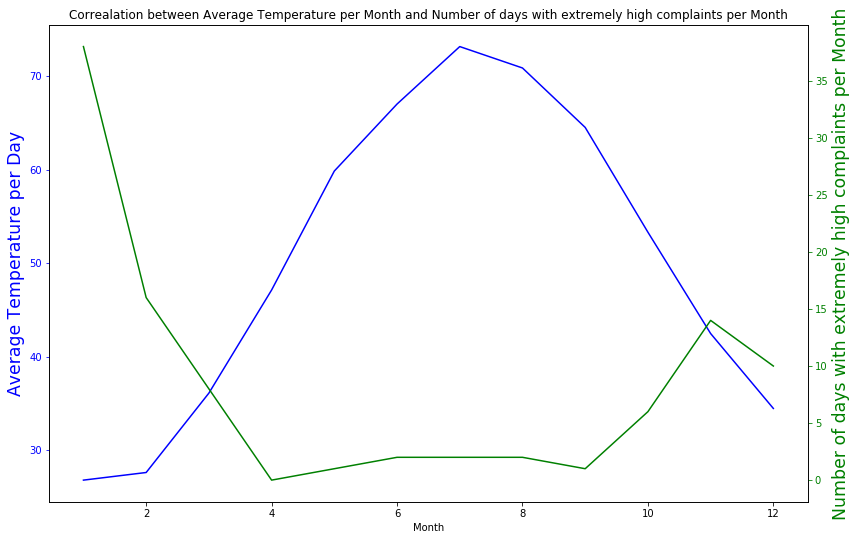

In [181]:
fig, ax1 = plt.subplots(figsize = (12, 8))
t = np.arange(1, 13)
ax1.plot(t, tem, 'b', label = 'Average Temperature per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Temperature per Day', size = 'xx-large', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(t, p1, 'g')
ax2.set_ylabel('Number of days with extremely high complaints per Month', size = 'xx-large', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()

plt.title('Correalation between Average Temperature per Month and Number of days with extremely high complaints per Month')
plt.savefig('../plots/cor2.png')

In [182]:
from scipy.stats import pearsonr 
print(pearsonr(tem, p1))

(-0.73824389860293183, 0.0061129577499336105)
